# Lab11. CNN (Convolutional Newural Network)

### 5. MNIST CNN Ensemble Layers

In [1]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

In [2]:
! pwd

/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow


In [3]:
import sys

sys.path.insert(0, '.')
# sys.path.insert(0, '/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow')


In [4]:
import model4

model4.Model Class Load !!


In [5]:
# Lab 11 MNIST and Deep learning CNN
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


### model4.py

### Training

In [6]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

# initialize
sess = tf.Session()

models = []
num_models = 2
for m in range(num_models):
    models.append(model4.Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')
time1 = time.time()

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
  
    time2 = time.time()
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list, 'p_time:', time2-time1)

print('Learning Finished!')
time2 = time.time()
chk_processting_time(time1, time2)


Learning Started!
Epoch: 0001 cost = [ 0.82711442  0.78495804] p_time: 281.9383370876312
Epoch: 0002 cost = [ 0.2930738   0.29289861] p_time: 558.6102945804596
Epoch: 0003 cost = [ 0.22756309  0.23318309] p_time: 820.4461743831635
Epoch: 0004 cost = [ 0.19712697  0.19778142] p_time: 1079.0071330070496
Epoch: 0005 cost = [ 0.18282352  0.18406503] p_time: 1336.456261396408
Epoch: 0006 cost = [ 0.1730285   0.17229101] p_time: 1596.9647433757782
Epoch: 0007 cost = [ 0.16330228  0.1589124 ] p_time: 1854.3152043819427
Epoch: 0008 cost = [ 0.15629985  0.15698036] p_time: 2123.486513376236
Epoch: 0009 cost = [ 0.14847688  0.15527392] p_time: 2389.7255623340607
Epoch: 0010 cost = [ 0.14623547  0.14653372] p_time: 2655.4458549022675
Epoch: 0011 cost = [ 0.14099916  0.14177114] p_time: 2922.322463274002
Epoch: 0012 cost = [ 0.13792419  0.13968794] p_time: 3196.0564863681793
Epoch: 0013 cost = [ 0.13552418  0.13554261] p_time: 3472.9366869926453
Epoch: 0014 cost = [ 0.13878496  0.14025194] p_time:

5408.038550615311

### Evaluation

In [7]:
# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9896
1 Accuracy: 0.9899
Ensemble accuracy: 0.9909


### 트레이닝 이력 관리?

In [9]:
batch_xs

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [10]:
batch_ys

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.

In [11]:
batch_xs.shape

(100, 784)

In [12]:
batch_ys.shape

(100, 10)

In [13]:
type(batch_xs)

numpy.ndarray

In [14]:
type(batch_ys)

numpy.ndarray

In [15]:
batch_size

100

### Prediction

In [39]:
m5 = model4.Model(sess, "m-ensemble")


Label:  [9]


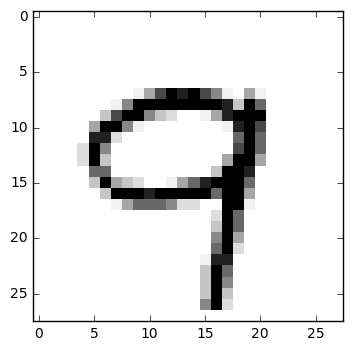

In [41]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
# print("Prediction: ", m5.predict(mnist.test.images[r:r + 1]))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [43]:
p = m.predict(mnist.test.images[r:r + 1])
predictions += p
predictions

array([[-32.58203936, -25.06859195,  -6.95515501, ...,  21.72357118,
         10.62556708,  12.01700115],
       [-12.97484368, -18.73685643,  18.9661901 , ..., -11.78520858,
         14.80804634,  -4.86895132],
       [-21.7327981 ,  -5.98700571, -10.4400239 , ..., -10.34534538,
         16.13064152,   0.68457103],
       ..., 
       [-36.3973012 , -27.03593218, -17.75198293, ...,  -8.36797094,
         19.67124054,  10.99340534],
       [-16.91331077, -36.91914845, -15.76148343, ..., -21.99358761,
         29.86913025,  -2.35699677],
       [ -8.3387233 , -36.46751738, -12.51887679, ..., -31.84945834,
         18.95994406,  -3.67785215]])